In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import sompy

In [99]:
data = pd.read_csv('df_adj.csv')
data.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
2,2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0
3,3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0
4,4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0


In [100]:
target = data['Diabetes']
data_reduced = data.drop(['Diabetes','Hypertension','Stroke'], axis = 1)
data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37652 entries, 0 to 37651
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Unnamed: 0            37652 non-null  int64
 1   Age                   37652 non-null  int64
 2   Sex                   37652 non-null  int64
 3   HighChol              37652 non-null  int64
 4   CholCheck             37652 non-null  int64
 5   BMI                   37652 non-null  int64
 6   Smoker                37652 non-null  int64
 7   HeartDiseaseorAttack  37652 non-null  int64
 8   PhysActivity          37652 non-null  int64
 9   Fruits                37652 non-null  int64
 10  Veggies               37652 non-null  int64
 11  HvyAlcoholConsump     37652 non-null  int64
 12  GenHlth               37652 non-null  int64
 13  MentHlth              37652 non-null  int64
 14  PhysHlth              37652 non-null  int64
 15  DiffWalk              37652 non-null  int64
dtypes: i

In [101]:
bmi_distinct = data['BMI'].unique().tolist()


In [102]:
max(bmi_distinct)

98

In [103]:
min(bmi_distinct)

12

In [104]:
list_bmi = data['BMI']


In [105]:
list_bmi_integer = [int(i) for i in list_bmi]


In [106]:
data['BMI_INT'] = list_bmi_integer

In [107]:
data['BMI_INT']

0        26
1        29
2        32
3        24
4        58
         ..
37647    40
37648    23
37649    22
37650    29
37651    26
Name: BMI_INT, Length: 37652, dtype: int64

In [108]:
data.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke,BMI_INT
0,0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0,26
1,1,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0,29
2,2,3,0,0,1,32,0,0,1,1,1,0,3,0,0,0,0,0,0,32
3,3,12,0,1,1,24,1,1,1,1,1,0,3,0,4,0,0,1,0,24
4,4,10,1,0,1,58,0,0,0,1,1,0,3,3,3,0,0,1,0,58


In [109]:
data_reduced = data_reduced.drop(['BMI'], axis = 1)


In [110]:
data_reduced.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk
0,0,4,1,0,1,0,0,1,0,1,0,3,5,30,0
1,1,8,0,0,1,1,0,1,1,1,0,2,0,0,0
2,2,3,0,0,1,0,0,1,1,1,0,3,0,0,0
3,3,12,0,1,1,1,1,1,1,1,0,3,0,4,0
4,4,10,1,0,1,0,0,0,1,1,0,3,3,3,0


In [111]:
data_reduced['BMI'] = list_bmi_integer

In [112]:
data_reduced.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI
0,0,4,1,0,1,0,0,1,0,1,0,3,5,30,0,26
1,1,8,0,0,1,1,0,1,1,1,0,2,0,0,0,29
2,2,3,0,0,1,0,0,1,1,1,0,3,0,0,0,32
3,3,12,0,1,1,1,1,1,1,1,0,3,0,4,0,24
4,4,10,1,0,1,0,0,0,1,1,0,3,3,3,0,58


In [25]:
data_reduced.dtypes

Unnamed: 0              int64
Age                     int64
Sex                     int64
HighChol                int64
CholCheck               int64
Smoker                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
BMI                     int64
dtype: object

In [113]:
def classify_person(bmi):
    if bmi < 18.5:
        return 'underweight'
    if bmi > 18.5 and bmi < 85:
        return 'normal weight'
    if bmi > 85 and bmi < 97:
        return 'overweight'
    if bmi > 97:
        return 'obesity'
    
data_reduced['BMI Category'] = data_reduced.apply(lambda row: classify_person(row['BMI']), axis=1)
data_reduced['BMI Category'].head()


    

0    normal weight
1    normal weight
2    normal weight
3    normal weight
4    normal weight
Name: BMI Category, dtype: object

In [114]:
data_reduced.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI,BMI Category
0,0,4,1,0,1,0,0,1,0,1,0,3,5,30,0,26,normal weight
1,1,8,0,0,1,1,0,1,1,1,0,2,0,0,0,29,normal weight
2,2,3,0,0,1,0,0,1,1,1,0,3,0,0,0,32,normal weight
3,3,12,0,1,1,1,1,1,1,1,0,3,0,4,0,24,normal weight
4,4,10,1,0,1,0,0,0,1,1,0,3,3,3,0,58,normal weight


In [115]:
category_map = {
    'underweight': 0,
    'normal weight': 1,
    'overweight': 2,
    'obesity': 3
}
data_reduced['BMIencoded'] = data_reduced['BMI Category'].map(category_map)
data_reduced.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI,BMI Category,BMIencoded
0,0,4,1,0,1,0,0,1,0,1,0,3,5,30,0,26,normal weight,1
1,1,8,0,0,1,1,0,1,1,1,0,2,0,0,0,29,normal weight,1
2,2,3,0,0,1,0,0,1,1,1,0,3,0,0,0,32,normal weight,1
3,3,12,0,1,1,1,1,1,1,1,0,3,0,4,0,24,normal weight,1
4,4,10,1,0,1,0,0,0,1,1,0,3,3,3,0,58,normal weight,1


In [116]:
data_reduced.values
data  = data_reduced.values
data = np.delete(data, 0,1)

1    37236
0      382
2       30
3        4
Name: BMIencoded, dtype: int64


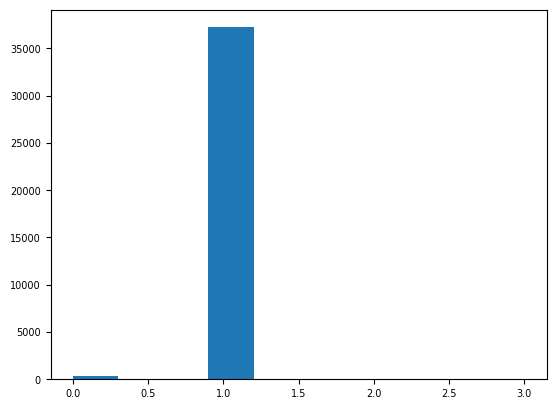

In [119]:
plt.hist(data_reduced['BMIencoded'])
counts = data_reduced['BMIencoded'].value_counts()
print(counts)


In [120]:
data_reduced = data_reduced.drop(['BMI Category'],axis = 1)
data_reduced.head()

,Unnamed: 0,Age,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,BMI,BMIencoded
0,0,4,1,0,1,0,0,1,0,1,0,3,5,30,0,26,1
1,1,8,0,0,1,1,0,1,1,1,0,2,0,0,0,29,1
2,2,3,0,0,1,0,0,1,1,1,0,3,0,0,0,32,1
3,3,12,0,1,1,1,1,1,1,1,0,3,0,4,0,24,1
4,4,10,1,0,1,0,0,0,1,1,0,3,3,3,0,58,1


In [121]:
features_to_encode = ['Age', 'MentHlth', 'GenHlth', 'PhysHlth']
data_encoded = pd.get_dummies(data_reduced, columns=features_to_encode)
data_encoded.head()

,Unnamed: 0,Sex,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,PhysHlth_21,PhysHlth_22,PhysHlth_23,PhysHlth_24,PhysHlth_25,PhysHlth_26,PhysHlth_27,PhysHlth_28,PhysHlth_29,PhysHlth_30
0,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
mapsize = [10,10]
som = sompy.SOMFactory.build(data_encoded.values, mapsize, mask = None, mapshape = 'planar', lattice = 'hexa', initialization='random')
results_som_train = som.train(n_job = 1,train_rough_len=1000 ,verbose = 'info')



 Training...
 random_initialization took: 0.004000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 1000

 epoch: 1 ---> elapsed time:  0.339000, quantization error: 137.358802

 epoch: 2 ---> elapsed time:  0.367000, quantization error: 7.994733

 epoch: 3 ---> elapsed time:  0.318000, quantization error: 7.932235

 epoch: 4 ---> elapsed time:  0.334000, quantization error: 7.920648

 epoch: 5 ---> elapsed time:  0.280000, quantization error: 7.911572

 epoch: 6 ---> elapsed time:  0.316000, quantization error: 7.905401

 epoch: 7 ---> elapsed time:  0.326000, quantization error: 7.901315

 epoch: 8 ---> elapsed time:  0.266000, quantization error: 7.900188

 epoch: 9 ---> elapsed time:  0.378000, quantization error: 7.899622

 epoch: 10 ---> elapsed time:  0.250000, quantization error: 7.899261

 epoch: 11 ---> elapsed time:  0.263000, quantization error: 7.898932

 epoch: 12 ---> elapsed time:  0.372000, quantization error: 7.898631

 epoch: 13 --

None


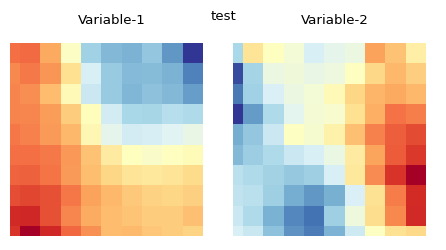

In [129]:
v = sompy.mapview.View2DPacked(50,50,'test', text_size = 8)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6)

In [130]:
from tqdm.auto import tqdm

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=3)
# print cl
getattr(som, 'cluster_labels')
# K = [i for i in range(1,8)]
# for nc in tqdm(K):
#     clf = som.cluster(n_clusters = nc, init = 'random', n_init = 100, max_iter = 30, verbose = 1)
    

/Users/ayoubeighissou/Documents/UnsupervisedProject2023/uvenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0,
       0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

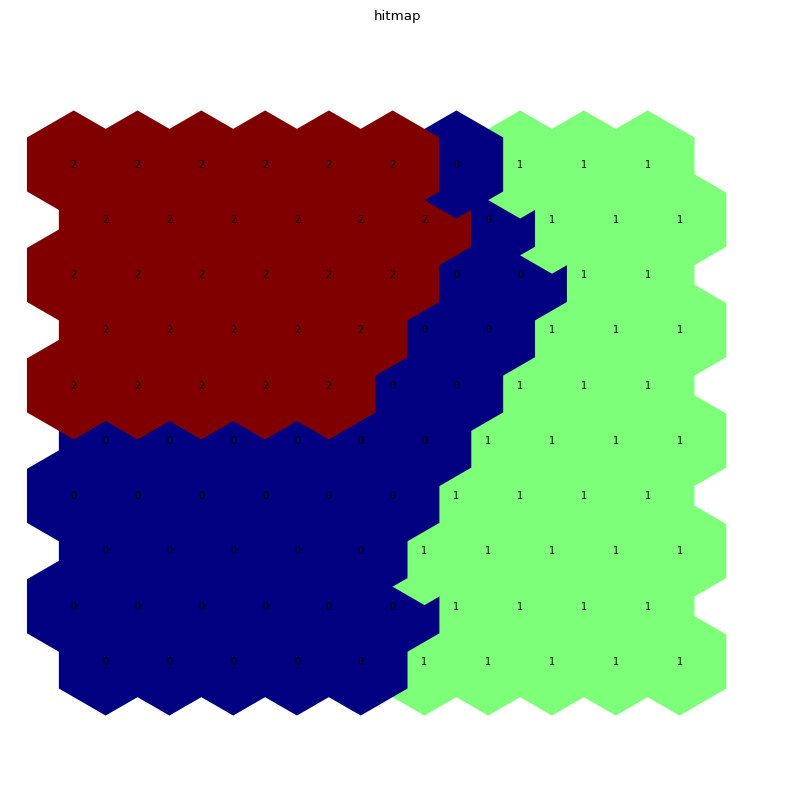

In [131]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

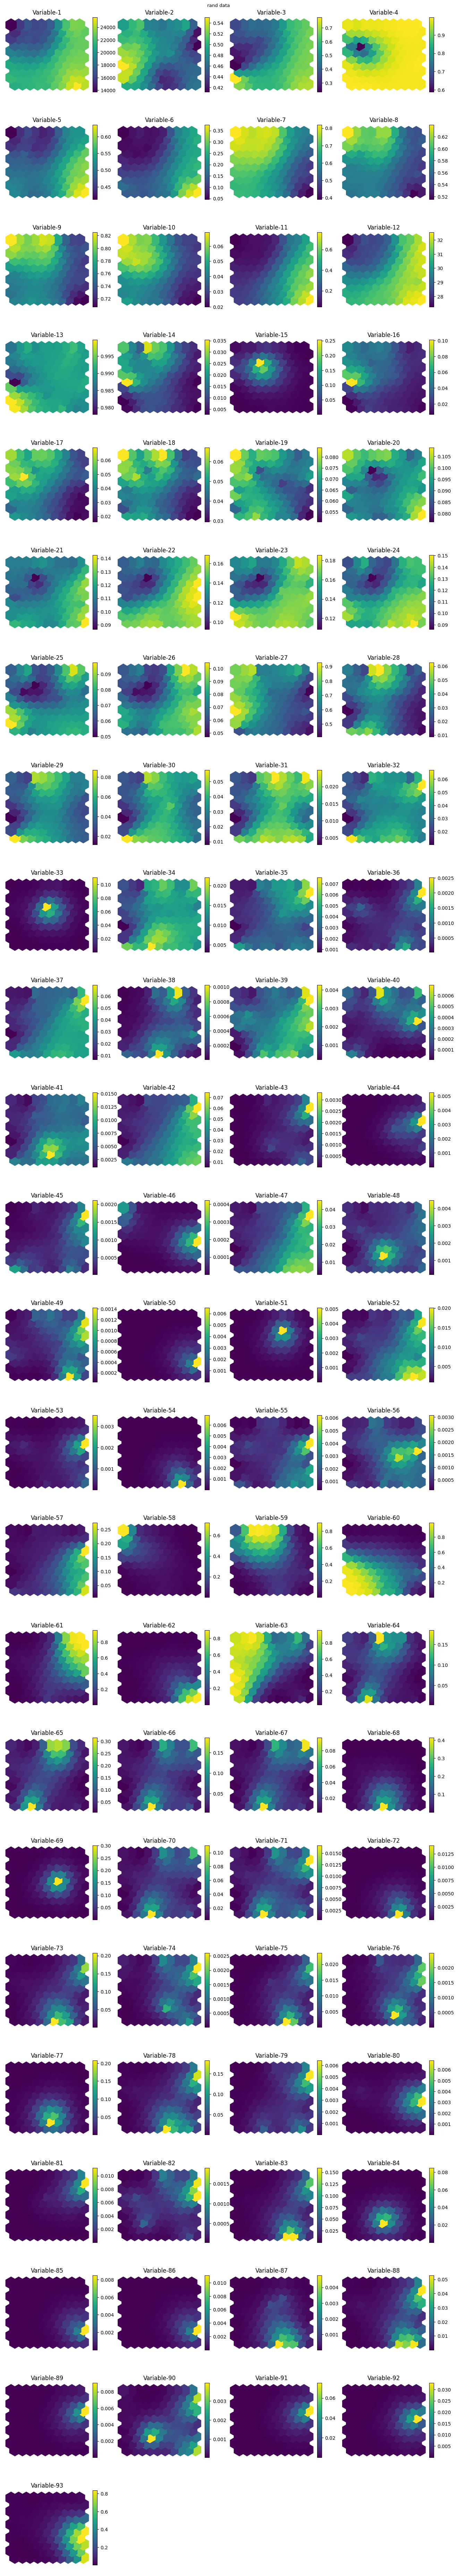

In [132]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(som, col_sz=4, which_dim="all", denormalize=True)

/Users/ayoubeighissou/Documents/UnsupervisedProject2023/uvenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


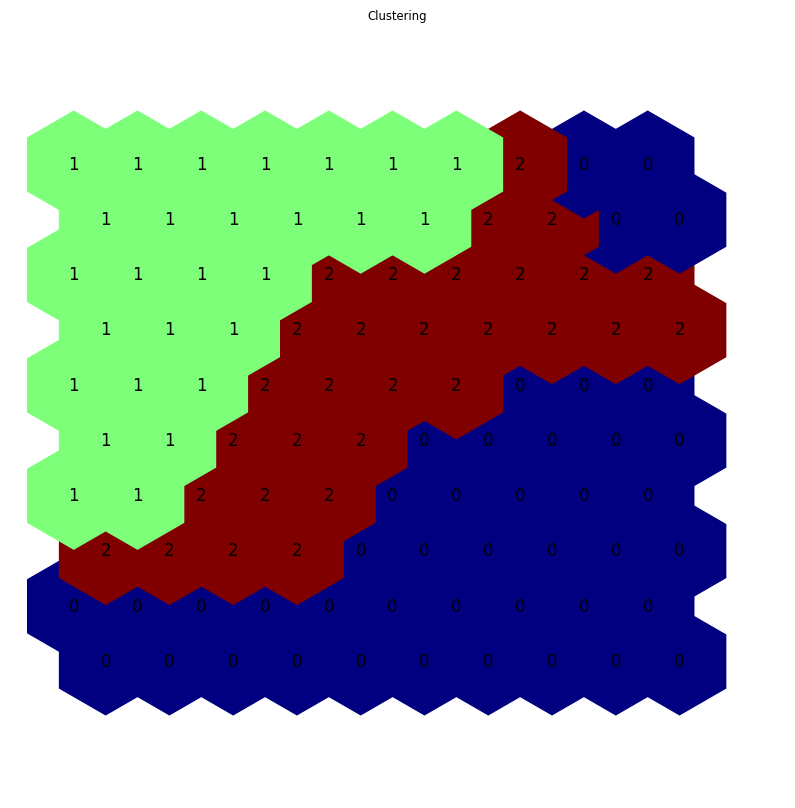

In [84]:
from sompy.visualization.hitmap import HitMapView
som.cluster(3)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(som, labelsize=12)